In [1]:
# For folder processing
from scipy.io import loadmat
import os
import tarfile
import urllib.request
import numpy as np

# For Image Processing and Display
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
def retrieve_dataset(url, target_folder):
    """
    Function:
        - Creates a subdirectory "./Data" in the current working directory if it doesn't exist already
        - Downloads the dataset into the newly created folder
        
    Arguments:
        - url: (str) URL of dataset
        - target_folder: (str) relative path of target folder
        
    Return:
        - A "./Data" folder containing the zipped dataset
    """
    # Path to downloaded file
    target_file = target_folder + "/" + url.split("/")[-1]
    
    # If the dataset has already been downloaded, terminate function
    if os.path.exists(target_file):
        print("Data has already been downloaded at '{}'.".format(target_file))
        return
    
    # If target folder doesn't exist yet, create it
    if not os.path.exists(target_folder):
        os.mkdir(target_folder.split("/")[-1])
        print("Created a new folder at '{}'.".format(target_folder))
        
    # Downloading the dataset
    print("Downloading dataset from '{}', please wait...".format(url))
    urllib.request.urlretrieve(url, target_file)  
    print("File successfully downloaded to '{}''.".format(path))

In [3]:
url_1 = "http://imagenet.stanford.edu/internal/car196/cars_train.tgz" 
target_folder = "./data"

In [4]:
# Load matlab file
original_dict_metadata = loadmat('devkit/cars_meta.mat')
#dict_meta = dictionary containing metadata

In [5]:
dict_idx_carname = {int(index+1):class_name[0] for index, class_name in enumerate(original_dict_metadata["class_names"][0])}

In [6]:
dict_idx_carname

{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [7]:
# Load matlab file
original_dict_traindata = loadmat('devkit/cars_train_annos.mat')

In [8]:
# Annotations = {"fname": {"bbox_xmin": 12, "bbox_xmax": 13, "bbox_y1": , "bbox_y2"}}

In [9]:
master_dict_traindata = {}

In [10]:
original_dict_traindata["annotations"][0]

array([(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
       (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
       (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
       ...,
       (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
       (array([[78]], dtype=uint8), array([[526]], dtype=uint16), array([[1489]], dtype=uint16), array([[908]], dtype=uint16), array([[112]], dtype=uint8), array(['08143.jpg'], dtype='<U9')),
       (array([[20]], dtype=uint8), arra

In [11]:
original_dict_traindata["annotations"][0][0][5][0]

'00001.jpg'

In [13]:
master_dict_traindata = {image[5][0]:{"bbox_xmin": image[0][0][0], "bbox_xmin": image[0][0][0], "bbox_xmax": image[1][0][0],"bbox_ymin": image[2][0][0],"bbox_ymax": image[3][0][0],"class_number": image[4][0][0], "class_name": dict_idx_carname[image[4][0][0]]} for image in original_dict_traindata["annotations"][0]}

In [14]:
def load_images_to_dictionary(image_path = "./data", dictionary = master_dict_traindata):
    """
    Function: 
        -loads images from the target folder
        -resizes and preprocesses the images 
        -append the original and preprocssed images, file names and labels into a "dataset"
    Arguments: 
        -folder (str): the directory containing the images
        -label (str): the class of images
        -width (int): desired width after resizing
        -height (int): desired height after resizing
    Returns: 
        -dataset (list): list of tuples: (nd.array of original image, nd.array of preprocessed image, image name, image label)
    """
    image_list = os.listdir(image_path)
    
    for index, filename in enumerate(image_list):
        img = Image.open(os.path.join(image_path,filename))
        img_np = np.array(img)
        dictionary[filename]["image"] = img_np
    return dictionary

In [17]:
master_dict_traindata = load_images_to_dictionary()

In [27]:
def show_image_in_dict(image_dict = master_dict_traindata, index = 0):
    """
    Function:
        - shows an image from the dataset and its label
    Arguments:
        - dataset (list): list of tuples: (nd.array of original image, nd.array of preprocessed image, image name, image label)
    Returns:
         none, but the function will show the original and preprocessedimage, its name and its label
    """
    
    file_name = list(image_dict.keys())[index]
    
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
    ax1.imshow(image_dict[file_name]["image"], interpolation='nearest')
    ax1.set_title("Your original image after resizing:")
    ax1.imshow(image_dict[file_name]["image"], interpolation='nearest')
    ax2.set_title("Preprocessed image as model input:")
    plt.show()
    print(f"Image title: {file_name}")
    print(f"Image class: {image_dict[file_name]['class_name']}")

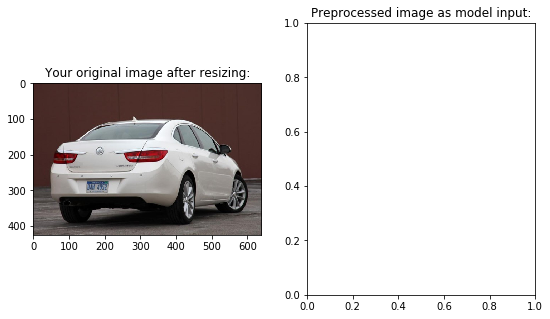

Image title: 00011.jpg
Image class: Buick Verano Sedan 2012


In [29]:
show_image_in_dict(index = 10)

In [30]:
_ = interact(show_image_in_dict, image_dict = fixed(master_dict_traindata), index=widgets.IntSlider(min=0,max=len(master_dict_traindata)-1,step=1,value=50), continous_update = False)

interactive(children=(IntSlider(value=50, description='index', max=8143), Output()), _dom_classes=('widget-int…